In [208]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas

In [209]:
# Used the following walkthrough from Tensorflow Documentation to learn how to use the dataset for training
# https://www.tensorflow.org/tutorials/keras/regression

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True).copy().dropna()

# Change string field "Origin" to bool columns
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pandas.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [210]:
# Separate into training and test data
training_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(training_data.index)

training_features = training_data.copy()
test_features = test_data.copy()

# Create labels from MPG column
training_labels = training_features.pop('MPG')
test_labels = test_data.pop('MPG')

# Create normalization layer for model
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(training_features))

print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025195e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


2022-02-14 17:07:23.616283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 17:07:23.630569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [211]:
# Create model
model = tf.keras.Sequential([
  normalizer,
  keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_46 (Normaliza  (None, 9)                19        
 tion)                                                           
                                                                 
 dense_31 (Dense)            (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [212]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [213]:
history = model.fit(
    np.asarray(training_features),
    np.asarray(training_labels),
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 23.0024 - val_loss: 22.9670


2022-02-14 17:07:24.015415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 17:07:24.170161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 22.0859 - val_loss: 22.2657
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 21.2373 - val_loss: 21.5439
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 20.4170 - val_loss: 20.8121
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 19.6122 - val_loss: 20.0479
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 18.7918 - val_loss: 19.3437
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 17.9727 - val_loss: 18.6150
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 17.1582 - val_loss: 17.8939
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 16.3331 - val_loss: 17.1706
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 15.5106 - val_loss: 16.4299
Epoch 11/100
8/8 [==============================] - 0s 6ms/step - loss: 14.7084 - val_loss: 15.7305
Epoch 1

In [214]:
print(model.predict(np.asarray(training_features[:10])))

[[26.110172]
 [24.739119]
 [12.211273]
 [31.300797]
 [32.141945]
 [22.470428]
 [32.833115]
 [24.775333]
 [20.53302 ]
 [26.299675]]


2022-02-14 17:07:29.346362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


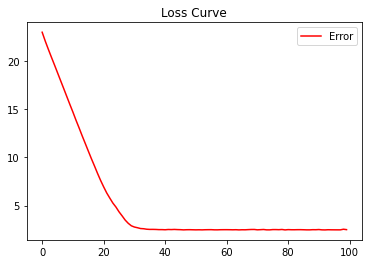

<Figure size 432x288 with 0 Axes>

In [215]:
import matplotlib.pyplot as plt

loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Error')

plt.title('Loss Curve')
plt.legend(loc=0)
plt.figure()

plt.show()